Epoch 100/1000, Loss: 0.3920
Epoch 200/1000, Loss: 0.3580
Epoch 300/1000, Loss: 0.3488
Epoch 400/1000, Loss: 0.3454
Epoch 500/1000, Loss: 0.3440
Epoch 600/1000, Loss: 0.3433
Epoch 700/1000, Loss: 0.3430
Epoch 800/1000, Loss: 0.3429
Epoch 900/1000, Loss: 0.3428
Epoch 1000/1000, Loss: 0.3427
Training Accuracy: 0.8625
Testing Accuracy: 0.8800


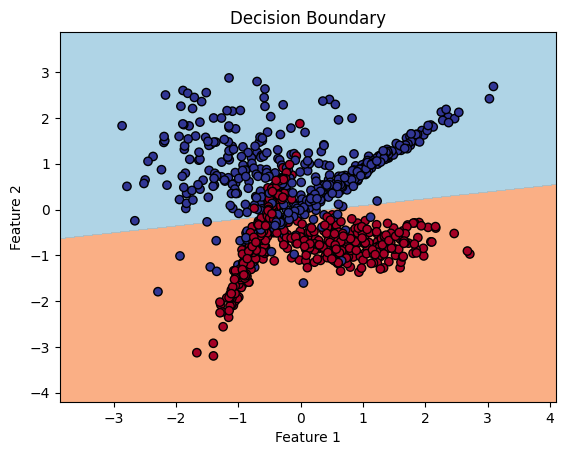

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate and prepare data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel(input_dim=2)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).round()
    y_pred_test = model(X_test_tensor).round()

train_acc = accuracy_score(y_train, y_pred_train.numpy())
test_acc = accuracy_score(y_test, y_pred_test.numpy())
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(
        torch.linspace(x_min, x_max, 100),
        torch.linspace(y_min, y_max, 100),
        indexing="ij"
    )
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
    with torch.no_grad():
        zz = model(grid).reshape(xx.shape).numpy()
    
    plt.contourf(xx.numpy(), yy.numpy(), zz, levels=[0, 0.5, 1], alpha=0.7, cmap="RdYlBu")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap="RdYlBu")
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Combine training and test data for visualization
X_combined = torch.cat((X_train_tensor, X_test_tensor), dim=0)
y_combined = torch.cat((y_train_tensor, y_test_tensor), dim=0).squeeze()

plot_decision_boundary(X_combined.numpy(), y_combined.numpy(), model)
